## Correlation between Entropy &  CV

In [ ]:
import pandas as pd
import geopandas as gpd
import statsmodels.formula.api as sm
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

# CV values
cv = pd.read_csv('C:/users/becky/documents/acs_research/C_results/19740/19740_hous_trials/19740_hous789_input_tracts.csv')
# entropy values
entropy = gpd.read_file('C:/users/becky/documents/thesis/ent_map.shp')

In [2]:
# make GEOIDs same format
cv['GEOID'] = cv.TID.map(lambda x: x.lstrip('g'))
cv['GEOID'] = cv.GEOID.map(lambda x: int(x))
entropy.GEOID = entropy.GEOID.map(lambda x: int(x))

In [3]:
# entropy values are GEOID and entropy
entropy.head()
# cv values are occupiedCV, pctownCV, pctrentCV, snglfmlyCV, avgroomsCV, avghmvalCV, avgrentCV
cv.head()

,TID,B25024_002E,B25082_001M,B25003_003M,B25024_002M,B25082_001E,B25003_003E,B25019_001M,B25002_002M,B25019_001E,...,avghmvalM,avgrentM,occupiedCV,pctownCV,pctrentCV,snglfmlyCV,avgroomsCV,avghmvalCV,avgrentCV,GEOID
0,g08047013800,2947,93784884.0,129,243,616704600.0,601,1688.0,179,19185.0,...,60671.014576,316.413105,0.062909,0.042752,0.122742,0.022690,0.069703,0.111058,0.181336,8047013800
1,g08039961209,806,33141552.0,43,54,202224100.0,134,448.0,62,5902.0,...,57495.839216,431.719994,0.025835,0.037121,0.189386,0.011814,0.060402,0.116147,0.280890,8039961209
2,g08039961208,1164,66750523.0,68,87,436738400.0,156,710.0,79,9195.0,...,74812.869198,1003.038379,0.002496,0.041981,0.261979,0.022081,0.061483,0.109444,0.435735,8039961208
3,g08039961207,1275,112028414.0,67,87,497525400.0,120,588.0,81,9989.0,...,101791.975812,963.573948,0.026341,0.036456,0.337289,0.031267,0.044983,0.146638,0.511580,8039961207
4,g08039961206,1188,39127898.0,45,81,360747000.0,41,644.0,89,8975.0,...,44186.614486,NaN,0.033173,0.022003,0.665589,0.025650,0.054431,0.083618,NaN,8039961206


In [4]:
df = pd.merge(cv, entropy, on=["GEOID"])
df1 = df[['entropy', 'occupiedCV', 'pctownCV', 'pctrentCV', 'snglfmlyCV', 'avgroomsCV', 'avghmvalCV', 'avgrentCV']]
# remove rows with null values
df1 = df1.replace([np.inf, -np.inf], np.nan)
df1.head()

,entropy,occupiedCV,pctownCV,pctrentCV,snglfmlyCV,avgroomsCV,avghmvalCV,avgrentCV
0,0.782054,0.062909,0.042752,0.122742,0.022690,0.069703,0.111058,0.181336
1,0.777942,0.025835,0.037121,0.189386,0.011814,0.060402,0.116147,0.280890
2,0.902238,0.002496,0.041981,0.261979,0.022081,0.061483,0.109444,0.435735
3,0.847425,0.026341,0.036456,0.337289,0.031267,0.044983,0.146638,0.511580
4,0.873858,0.033173,0.022003,0.665589,0.025650,0.054431,0.083618,NaN


In [5]:
result = sm.ols(formula="entropy ~ occupiedCV + pctownCV + pctrentCV + snglfmlyCV + avgroomsCV + avghmvalCV + avgrentCV", data=df1, missing='drop').fit()
print result.summary()

                            OLS Regression Results                            
Dep. Variable:                entropy   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.2528
Date:                Fri, 18 Nov 2016   Prob (F-statistic):              0.971
Time:                        07:32:22   Log-Likelihood:                 344.69
No. Observations:                 561   AIC:                            -673.4
Df Residuals:                     553   BIC:                            -638.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.7277      0.023     31.525      0.0

In [18]:
result = sm.gls(formula="entropy ~ occupiedCV + pctownCV + pctrentCV + snglfmlyCV + avgroomsCV + avghmvalCV + avgrentCV", data=df1, missing='drop').fit()
print result.summary()

                            GLS Regression Results                            
Dep. Variable:                entropy   R-squared:                       0.003
Model:                            GLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.2528
Date:                Fri, 18 Nov 2016   Prob (F-statistic):              0.971
Time:                        07:39:01   Log-Likelihood:                 344.69
No. Observations:                 561   AIC:                            -673.4
Df Residuals:                     553   BIC:                            -638.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.7277      0.023     31.525      0.0

(array([   3.,    1.,    4.,  130.,  200.,  133.,   89.,   42.,    9.,    3.]),
 array([-67.98256863, -54.54065511, -41.0987416 , -27.65682809,
        -14.21491458,  -0.77300106,  12.66891245,  26.11082596,
         39.55273947,  52.99465299,  66.4365665 ]),
 <a list of 10 Patch objects>)

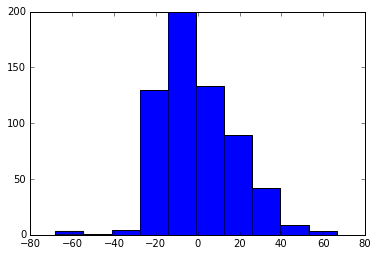

In [47]:
plt.hist(result.resid.values)

(array([  0.,   0.,   0.,   0.,   2.,   0.,   1.,   4.,   1.,   1.,   4.,
          3.,   4.,  13.,   8.,  12.,  19.,  21.,  37.,  43.,  59.,  48.,
         67.,  79.,  68.,  66.,  34.,  16.,   3.,   0.]),
 array([ 0.        ,  0.03333333,  0.06666667,  0.1       ,  0.13333333,
         0.16666667,  0.2       ,  0.23333333,  0.26666667,  0.3       ,
         0.33333333,  0.36666667,  0.4       ,  0.43333333,  0.46666667,
         0.5       ,  0.53333333,  0.56666667,  0.6       ,  0.63333333,
         0.66666667,  0.7       ,  0.73333333,  0.76666667,  0.8       ,
         0.83333333,  0.86666667,  0.9       ,  0.93333333,  0.96666667,  1.        ]),
 <a list of 30 Patch objects>)

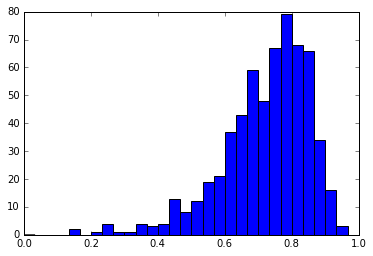

In [15]:
plt.hist(entropy.entropy.values, bins=30, range=(0,1))

## Correlation between Degree & Co-occurrence rate, Degree & Entropy, Entropy & Co-oc Rate

### Degree & Entropy

In [21]:
# entropy measure
entropy.head()

,COUNTYFP,FUNCSTAT,GEOID,INTPTLAT,INTPTLON,MTFCC,NAME,NAMELSAD,RID,STATEFP,TRACTCE,code,entropy,geometry
0,047,S,8047013800,+39.8610823,-105.5289473,G5020,138,Census Tract 138,57,08,013800,08047,0.782054,"POLYGON ((-105.700784 39.878889, -105.700777 3..."
1,039,S,8039961209,+39.2219883,-104.5372888,G5020,9612.09,Census Tract 9612.09,40,08,961209,08039,0.777942,"POLYGON ((-104.662911 39.13184, -104.662929 39..."
2,039,S,8039961208,+39.3047374,-104.5835294,G5020,9612.08,Census Tract 9612.08,19,08,961208,08039,0.902238,"POLYGON ((-104.662955 39.216802, -104.662947 3..."
3,039,S,8039961207,+39.4108496,-104.5420129,G5020,9612.07,Census Tract 9612.07,19,08,961207,08039,0.847425,"POLYGON ((-104.606923 39.361336, -104.606833 3..."
4,039,S,8039961206,+39.4125779,-104.6348187,G5020,9612.06,Census Tract 9612.06,68,08,961206,08039,0.873858,"POLYGON ((-104.663196 39.362143, -104.663198 3..."


In [22]:
# Degree
a = pd.read_csv('C:/users/becky/documents/thesis/degree_hous_19740.csv')

In [23]:
a = a[['GEOID', 'degree']]
a.GEOID = a.GEOID.map(lambda x: int(x.lstrip('g')))

In [24]:
ab = pd.merge(a, entropy, on=["GEOID"])

In [25]:
result = sm.ols(formula="entropy ~ degree", data=ab, missing='drop').fit()
print result.summary()

                            OLS Regression Results                            
Dep. Variable:                entropy   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3.037
Date:                Fri, 18 Nov 2016   Prob (F-statistic):             0.0819
Time:                        08:30:47   Log-Likelihood:                 370.06
No. Observations:                 607   AIC:                            -736.1
Df Residuals:                     605   BIC:                            -727.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.7029      0.011     64.848      0.0

In [26]:
ab['log_ent'] = ab.entropy.map(lambda x: math.log(x))
ab['log_deg'] = ab.degree.map(lambda x: math.log(x))

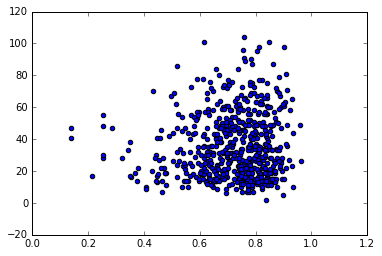

In [27]:
plt.scatter(ab.entropy, ab.degree)

## Entropy & Co-occurrence rate

In [28]:
# read co-oc rate
cooc = gpd.read_file('C:/users/becky/documents/thesis/rate_map.shp')
cooc.GEOID = cooc.GEOID.map(lambda x: int(x))
cooc.head()

,COUNTYFP,FUNCSTAT,GEOID,INTPTLAT,INTPTLON,MTFCC,NAME,NAMELSAD,RID,STATEFP,TRACTCE,code,geometry,rate
0,047,S,8047013800,+39.8610823,-105.5289473,G5020,138,Census Tract 138,57,08,013800,08047,"POLYGON ((-105.700784 39.878889, -105.700777 3...",0.070000
1,039,S,8039961209,+39.2219883,-104.5372888,G5020,9612.09,Census Tract 9612.09,40,08,961209,08039,"POLYGON ((-104.662911 39.13184, -104.662929 39...",0.120000
2,039,S,8039961208,+39.3047374,-104.5835294,G5020,9612.08,Census Tract 9612.08,19,08,961208,08039,"POLYGON ((-104.662955 39.216802, -104.662947 3...",0.140000
3,039,S,8039961207,+39.4108496,-104.5420129,G5020,9612.07,Census Tract 9612.07,19,08,961207,08039,"POLYGON ((-104.606923 39.361336, -104.606833 3...",0.180000
4,039,S,8039961206,+39.4125779,-104.6348187,G5020,9612.06,Census Tract 9612.06,68,08,961206,08039,"POLYGON ((-104.663196 39.362143, -104.663198 3...",0.149425


In [29]:
bc = pd.merge(cooc, entropy, on=["GEOID"])

In [32]:
bc['log_ent'] = bc.entropy.map(lambda x: math.log(x))
bc['log_rate'] = bc.rate.map(lambda x: math.log(x))

In [33]:
result = sm.ols(formula="entropy ~ log_rate", data=bc, missing='drop').fit()
print result.summary()

                            OLS Regression Results                            
Dep. Variable:                entropy   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     3.602
Date:                Fri, 18 Nov 2016   Prob (F-statistic):             0.0582
Time:                        08:31:03   Log-Likelihood:                 370.34
No. Observations:                 607   AIC:                            -736.7
Df Residuals:                     605   BIC:                            -727.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.7752      0.030     25.909      0.0

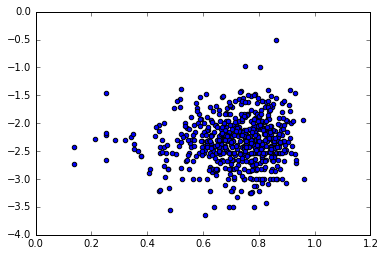

In [34]:
plt.scatter(bc.entropy, bc.log_rate)

## Co-occurrence and Degree

In [35]:
# read co-oc rate
cooc.head()

,COUNTYFP,FUNCSTAT,GEOID,INTPTLAT,INTPTLON,MTFCC,NAME,NAMELSAD,RID,STATEFP,TRACTCE,code,geometry,rate
0,047,S,8047013800,+39.8610823,-105.5289473,G5020,138,Census Tract 138,57,08,013800,08047,"POLYGON ((-105.700784 39.878889, -105.700777 3...",0.070000
1,039,S,8039961209,+39.2219883,-104.5372888,G5020,9612.09,Census Tract 9612.09,40,08,961209,08039,"POLYGON ((-104.662911 39.13184, -104.662929 39...",0.120000
2,039,S,8039961208,+39.3047374,-104.5835294,G5020,9612.08,Census Tract 9612.08,19,08,961208,08039,"POLYGON ((-104.662955 39.216802, -104.662947 3...",0.140000
3,039,S,8039961207,+39.4108496,-104.5420129,G5020,9612.07,Census Tract 9612.07,19,08,961207,08039,"POLYGON ((-104.606923 39.361336, -104.606833 3...",0.180000
4,039,S,8039961206,+39.4125779,-104.6348187,G5020,9612.06,Census Tract 9612.06,68,08,961206,08039,"POLYGON ((-104.663196 39.362143, -104.663198 3...",0.149425


In [36]:
a.head()

,GEOID,degree
0,8005007101,50
1,8005007103,87
2,8005007104,76
3,8005007105,66
4,8005007106,104


In [37]:
cd = pd.merge(cooc, a, on=["GEOID"])

In [40]:
cd['log_rate'] = cd.rate.map(lambda x: math.log(x))

In [41]:
result = sm.ols(formula="degree ~ log_rate", data=cd, missing='drop').fit()
print result.summary()

                            OLS Regression Results                            
Dep. Variable:                 degree   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     211.2
Date:                Fri, 18 Nov 2016   Prob (F-statistic):           2.57e-41
Time:                        08:31:12   Log-Likelihood:                -2629.0
No. Observations:                 614   AIC:                             5262.
Df Residuals:                     612   BIC:                             5271.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     92.0255      3.927     23.436      0.0

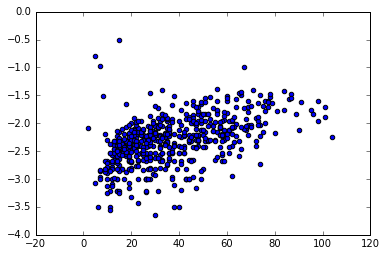

In [42]:
plt.scatter(cd.degree, cd.log_rate)